# Tareas

<div class="alert alert-warning">
Fecha límite de entrega: 6 de octubre, 2020 23:59
</div>

In [1]:
from sympy import *
%pylab inline 
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed
from IPython.html import widgets

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['diff', 'floor', 'product', 'tanh', 'power', 'exp', 'invert', 'minimum', 'roots', 'trace', 'beta', 'sinh', 'sqrt', 'test', 'source', 'var', 'eye', 'plot', 'take', 'det', 'zeros', 'ifft', 'interactive', 'fft', 'pi', 'tan', 'solve', 'seterr', 'cos', 'vectorize', 'poly', 'cbrt', 're', 'cosh', 'Number', 'sign', 'Circle', 'sinc', 'gamma', 'nan', 'prod', 'add', 'multinomial', 'deprecated', 'plotting', 'diag', 'lcm', 'Line2D', 'gcd', 'log', 'mod', 'transpose', 'partition', 'binomial', 'trunc', 'Polygon', 'reshape', 'array', 'sin', 'ones', 'maximum', 'flatten', 'conjugate']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
/opt/conda/lib/python3.8/site-packages/IPython/html.py:12: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `noteboo

# Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

In [2]:
from sympy import *
J = Function("J")
b0 = Symbol("beta0")
b1 = Symbol("beta1")
b = Symbol("beta")
bj = Symbol("beta_j")
m = Symbol ("m")
n = Symbol ("n")
y = Symbol ("y")
i = Symbol ("i")
j = Symbol ("j")
x = Symbol ("x")

"""
Declaramos todos los signos que usaremos y 
escribimos la funcion de costo
"""

suma = Sum((Indexed(y,i)-b0-b1*Indexed(x,i))**2,(i,1,m))

Costo= Eq(J(b0,b1), 1/(2*m)*suma)

Costo

Eq(J(beta0, beta1), Sum((-beta0 - beta1*x[i] + y[i])**2, (i, 1, m))/(2*m))

In [3]:
#Derivamos contra B0
Parcial1 = Eq(Derivative(Costo.lhs,b0),Derivative(Costo.rhs,b0)).doit()
simplify(Parcial1)

Eq(Derivative(J(beta0, beta1), beta0), Sum(beta0 + beta1*x[i] - y[i], (i, 1, m))/m)

In [4]:
#Derivamos contra B1
Parcial2 = Eq(Derivative(Costo.lhs,b1),Derivative(Costo.rhs,b1)).doit()
simplify(Parcial2)

Eq(Derivative(J(beta0, beta1), beta1), Sum((beta0 + beta1*x[i] - y[i])*x[i], (i, 1, m))/m)

#### En general

In [5]:
subsuma = Sum(Indexed(b,j)*Indexed(x,j),(j,0,n))
sumag = Sum((Indexed(y,i)-subsuma)**2,(i,1,m))

Costog = Eq(J(b),1/(2*m)*sumag)

In [7]:
#Es la funcion en general
Costog

Eq(J(beta), Sum((y[i] - Sum(beta[j]*x[j], (j, 0, n)))**2, (i, 1, m))/(2*m))

In [8]:
#Ejemplo sobre la base indexada
M = IndexedBase(b,j)
j = symbols('j', cls=Idx)
M[10]

beta[10]

In [9]:
#Hacemos la funcion de costo para el caso general con la base indexada
subsuma = Sum(M[j]*Indexed(x,j),(j,0,n))
sumag = Sum((Indexed(y,i)-subsuma)**2,(i,1,m))

Costog = Eq(J(b),1/(2*m)*sumag)

Costog

Eq(J(beta), Sum((y[i] - Sum(beta[j]*x[j], (j, 0, n)))**2, (i, 1, m))/(2*m))

In [11]:
#Derivamos respecto a Bj para tenerlo en general
derecho = simplify(diff(Costog.rhs,M[j]).doit())
izquierdo = Derivative(Costog.lhs,Indexed(b,j))
derivada = Eq(izquierdo, derecho) 
#simplify(Parcialj)
derivada

Eq(Derivative(J(beta), beta[j]), Sum((beta[j]*Sum(x[j], (j, 0, n)) - y[i])*x[j], (j, 0, n), (i, 1, m))/m)

# Problema 2

https://scipython.com/blog/visualizing-the-gradient-descent-method/
https://www.kdnuggets.com/2020/05/5-concepts-gradient-descent-cost-function.html

In [12]:
class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia, que tanto nos estamos acercando
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        self.i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while self.i < self.max_iters:     
            # Actualizamos beta (con la formula de betaj)
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            #En el if estamos checando la convergencia
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), self.i ))
                self.breaking_iteration = self.i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        #Producto punto
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        #La diferencia
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m
    
    
def Graficar(x,y, R):
    """
    R es el objeto Regresion Lineal
    Graficamos los datos y la recta
    """
    modelo = lambda x,b,m: b + m*x
    iteracion = R.i-1
    Beta = R.historia['beta'][iteracion]
    plt.scatter(x,y, label="Datos")
    plt.plot(x, modelo(x, Beta[0], Beta[1]))

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [16]:
#Usamos los datos de edad y altura para poder graficar la funcion de costo
X = np.loadtxt('data/edad.dat')
Y = np.loadtxt('data/altura.dat')

#Definimos una nueva funcion de costos
def J(beta0, beta1):
    """
    Hacemos la funcion de costo iterando para las 3 dimensiones
    """
    costo = 0
    for i in range(len(Y)):
        costo+= (Y[i]-beta0-beta1*X[i])**2/(2*len(Y))
    return costo


b0 = np.arange(-2,3,.01)
b1 = np.arange(-2,2,.01)
B0,B1 = np.meshgrid(b0,b1)
Costo = J(B0,B1)


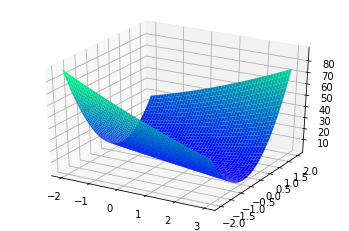

In [17]:
#Graficamos la superficie
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(B0,B1,Costo, cmap="winter")


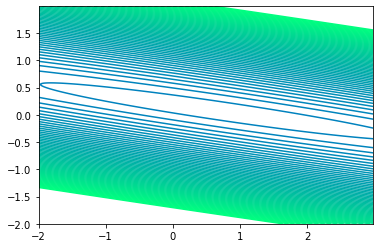

In [18]:
#Grafica de contorno
fig = plt.figure()
plt.contour(B0,B1,Costo, levels= np.arange(-50,50,.8), cmap="winter")


**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

In [19]:
#Usamos el objeto Regresion lineal para saber en que punto e iteracion converge
prob2 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=0)
prob2.gradientDescent(X, Y)

La función convergió con beta: [0.75016232 0.06388121] en la iteración 47999


In [20]:
puntoFinal = [prob2.historia['beta'][prob2.i-1][0], prob2.historia['beta'][prob2.i-1][1], prob2.historia["costo"][prob2.i-1]]
puntoFinal
#Punto de la ultima iteracion

[0.7501623203491192, 0.06388120524299257, 0.0009870699732786512]

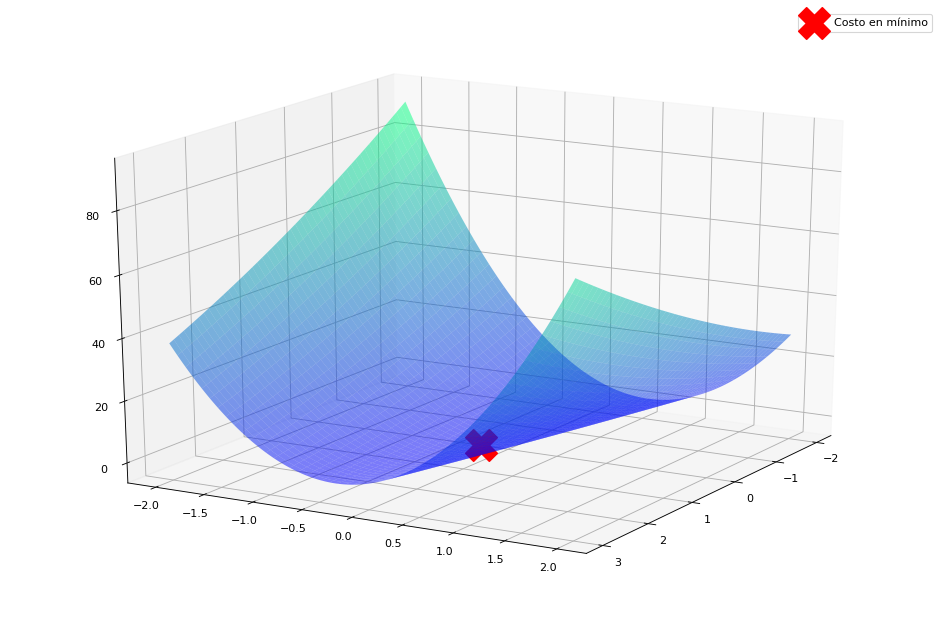

In [21]:
#Graficamos el punto final con la grafica

fig = plt.figure(figsize=(15, 10), dpi=80)
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(B0,B1,Costo, cmap="winter", antialiased=True, alpha=0.5)
ax.scatter(puntoFinal[0], puntoFinal[1], puntoFinal[2], linewidths=1.5, c="r", marker="X", s=800, label="Costo en mínimo")
ax.view_init(20, 30)
#print('ax.azim {}'.format(ax.azim))
#print('ax.elev {}'.format(ax.elev))
ax.legend()




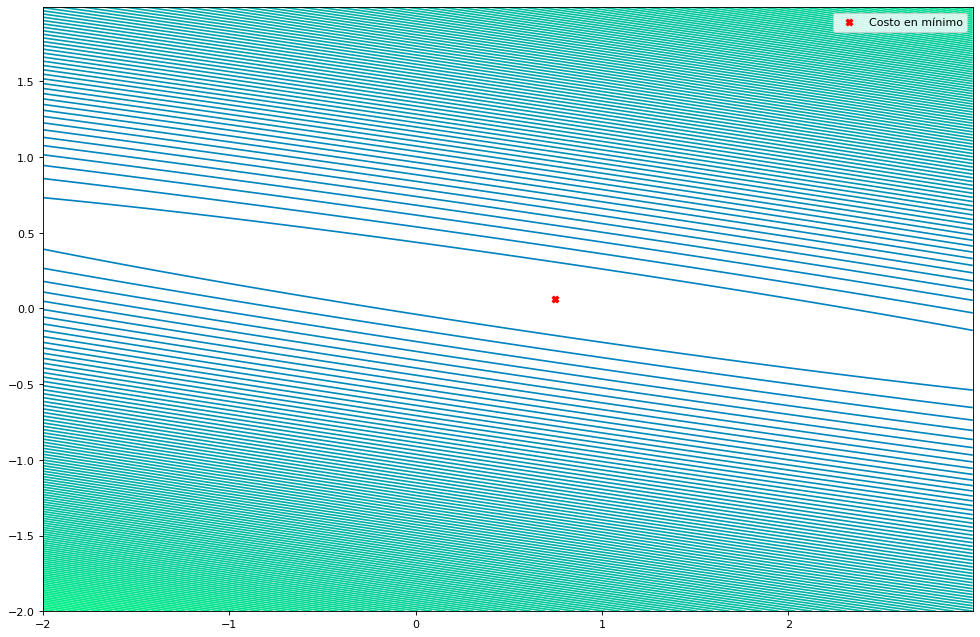

In [22]:
#Graficamos el punto final en la grafica de contorno
fig = plt.figure(figsize=(15, 10), dpi=80)
plt.contour(B0,B1,Costo, levels= np.arange(-100,100,.8), cmap="winter")
plt.scatter(puntoFinal[0], puntoFinal[1],c="r", marker="X", label="Costo en mínimo")
plt.legend(loc="best")

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.


In [23]:
def CostoIteraciones(iteracion):
    """
    Grafica de contorno con modificacion de la iteracion
    """
    fig = plt.figure(figsize=(15, 10), dpi=80)
    plt.contour(B0,B1,Costo, levels= np.arange(-100,100,.8), cmap="winter")
    plt.scatter(prob2.historia['beta'][iteracion-1][0], prob2.historia['beta'][iteracion-1][1],c="g",s=150, marker="X", label=str("Costo en la iteración "+str(iteracion)))
    plt.scatter(puntoFinal[0], puntoFinal[1],c="r", marker="X", label="Costo en mínimo")
    plt.legend(loc="best")

interact(CostoIteraciones, iteracion=(1,prob2.i-1, 10));    


interactive(children=(IntSlider(value=23991, description='iteracion', max=47998, min=1, step=10), Output()), _…


**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [24]:
#Ejemplifica que sucede cuando modificamos alpha
def ModificarAlpha(alphax):
    modif = RegresionLineal(alpha= alphax, max_iters=10000000, tols=0)
    return modif.gradientDescent(X, Y)

interact(ModificarAlpha, alphax=(.0003,.003,.0001)); 


interactive(children=(FloatSlider(value=0.0016, description='alphax', max=0.003, min=0.0003, step=0.0001), Out…

# Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [25]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Text(0, 0.5, 'Second')

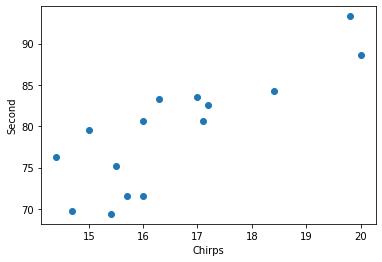

In [26]:
#leemos los datos y los graficamos
datos = np.loadtxt('data/chirps.txt', dtype="float", delimiter="\t", skiprows=1)
X = datos[:,0]
Y = datos[:,1]
plt.scatter(X,Y)
plt.xlabel('Chirps')
plt.ylabel('Second')

In [27]:
r = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
r.gradientDescent(X, Y)

La función convergió con beta: [22.84871924  3.41033872] en la iteración 384673


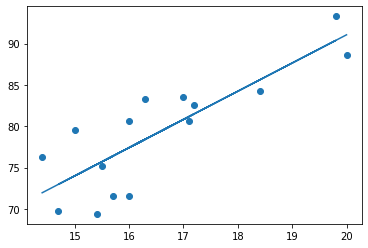

In [28]:
#Funcion definida en el objeto para graficar puntos y recta
Graficar(X,Y,r)

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


# Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [29]:
Anscombe = np.loadtxt("data/quartet.txt", dtype="float", delimiter=",", skiprows=1)
#Utilizamos las 4 columnas de datos para las distintas graficas

In [30]:
A1 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A1.gradientDescent(Anscombe[:,0], Anscombe[:,1])

La función convergió con beta: [3.00008683 0.50009131] en la iteración 41286


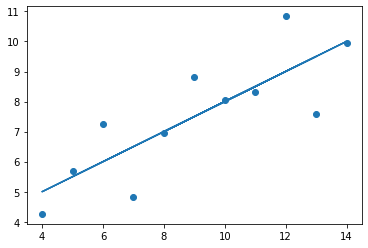

In [31]:
Graficar(Anscombe[:,0], Anscombe[:,1], A1)

In [32]:
A2 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A2.gradientDescent(Anscombe[:,2], Anscombe[:,3])

La función convergió con beta: [3.00090503 0.5000004 ] en la iteración 41305


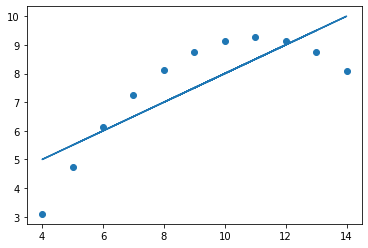

In [33]:
Graficar(Anscombe[:,2], Anscombe[:,3], A2)

In [34]:
A3 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A3.gradientDescent(Anscombe[:,4], Anscombe[:,5])

La función convergió con beta: [3.00244952 0.49972777] en la iteración 40652


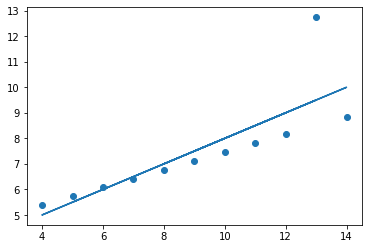

In [35]:
Graficar(Anscombe[:,4], Anscombe[:,5], A3)

In [36]:
A4 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
A4.gradientDescent(Anscombe[:,6], Anscombe[:,7])

La función convergió con beta: [3.00172424 0.49990939] en la iteración 42197


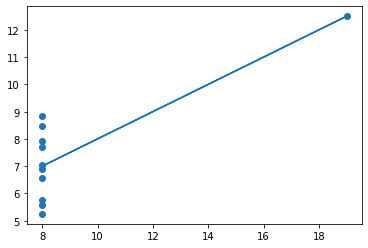

In [37]:
Graficar(Anscombe[:,6], Anscombe[:,7], A4)

# Problema 5

Use el archivo `radioactive_decay.dat`

In [38]:
%cat data/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'Remaining')

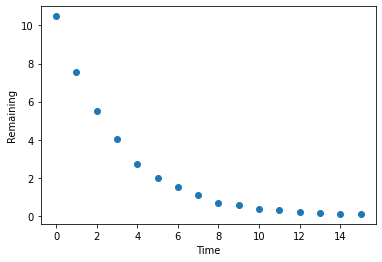

In [39]:
datos2 = np.loadtxt('data/radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=1)
time = datos2[:,0]
N = datos2[:,1]
plt.scatter(time,N)
plt.xlabel('Time')
plt.ylabel('Remaining')

In [40]:
radioactive = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
radioactive.gradientDescent(time,N)

La función convergió con beta: [ 6.45691016 -0.54933808] en la iteración 18655


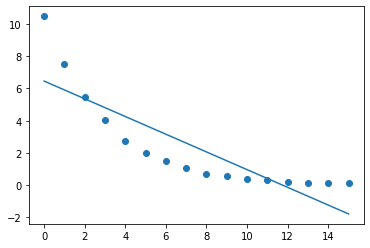

In [41]:
Graficar(time, N, radioactive)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

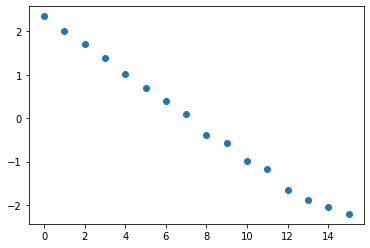

In [42]:
#Es similar a un modelo exponencial, así que aplicamos log
N2 = np.log(N)
plt.scatter(time, N2)

In [43]:
data = np.append(time, N2)

data = data.reshape(int(len(data)/2),2, order="F")

np.savetxt("transform_radioactive_decay.txt",data, delimiter="\t")


In [44]:
#%cat transform_radioactive_decay.txt

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

Text(0, 0.5, 'Remaining')

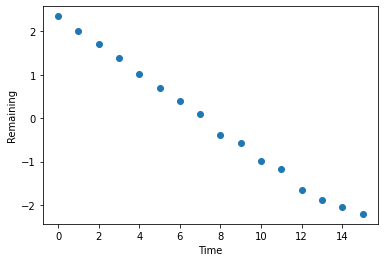

In [45]:
datos3 = np.loadtxt('transform_radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=0)
time2 = datos3[:,0]
N2 = datos3[:,1]
plt.scatter(time2,N2)
plt.xlabel('Time')
plt.ylabel('Remaining')

In [46]:
radio = RegresionLineal(alpha=0.003, max_iters=10000000, tols=.0)
radio.gradientDescent(time2,N2)

La función convergió con beta: [ 2.29661472 -0.31664834] en la iteración 19651


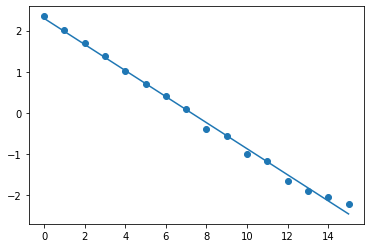

In [47]:
Graficar(time2, N2, radio)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son en el espacio sin transformar? Explique.

In [48]:
Beta1 = radioactive.historia['beta'][radioactive.i-1]
Beta2 = radio.historia['beta'][radio.i-1]

#Los mejores valores de beta son aquellos en los que la funcion de costo alcanza su minimo (converge)

In [49]:
Beta1

array([ 6.45691016, -0.54933808])

In [50]:
Beta2

array([ 2.29661472, -0.31664834])